# SET UP

In [1]:
import pandas as pd
import seaborn as sns
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
from scipy.stats import iqr
import umap
import functions
import numpy as np

In [2]:
ct_to_col = {
    'CD4 T': '#1f77b4',
    'CD14 Monocytes': '#ff7f0e',
    'B': '#279e68',
    'CD8 T': '#d62728',
    'FCGR3A Monocytes': '#aa40fc',
    'NK': '#8c564b',
    'Dendritic': '#e377c2',
    'Megakaryocytes': '#b5bd61'
}

# DATA PREPARATION

## MODELS SIMULATION RESULTS

,biomass_maintenance,objective_value,percent_ov
CTTAAGCTCCGCTT-1,96.848548,22865.793371,8.265247
CATCAGGATTTCGT-1,215.338298,116172.757726,41.992703
ATAAACACAGTGCT-1,120.975824,90882.347309,32.851036
CATTTGACCACACA-1,183.243383,124855.015309,45.131059
CATTTGTGCGGAGA-1,160.656761,117989.963695,42.649565
...,...,...,...
ATATGCCTTCTCTA-1,195.155178,123658.083021,44.698407
CTATACTGAGGTTC-1,181.681237,87139.825046,31.498235
GTTGAGTGGTCTTT-1,193.268494,93911.227706,33.945879
GCGGAGCTCCTGAA-1,107.307576,132906.872636,48.041546


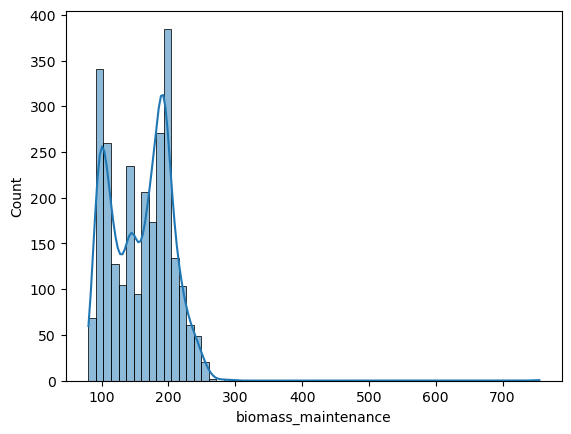

In [3]:
r_models = pd.read_csv("/Users/claudiavicentecomorera/Desktop/TFG/Results/PBMC3k/pfba_rmodels_pbmc3k.csv", index_col = 0)
sns.histplot(r_models, x = "biomass_maintenance", bins = 60, kde = True)
r_models

## FLUXOMES DATAFRAME

For models visualization, we will use the fluxes data frame extracted from pFBA results, previously created in the fluxes simulation script (FS_PBMC3K). 
- This data frame contains all the reactions from all the context-specific models.
- As all models do not contain the same reactions, the missing ones have been padded with 0.0.

In [4]:
fluxes_df = pd.read_csv("/Users/claudiavicentecomorera/Desktop/TFG/Results/PBMC3k/pfba_fluxes_pbmc3k.csv", index_col = 0)
fluxes_df

,2HBO,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPLACOX_NADP_,34DHXMANDACOX_NADP_,34HPLFM,3DPHBH1,3HBCDm,3HBCOAHLm,...,DM_btn[m],DCMPtm,PROTEIN_BS,DM_PROTEIN,ATPS4mi,CYOR_u10mi,Htmi,NADH2_u10mi,CYOOm3i,CYOOm2i
CTTAAGCTCCGCTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CATCAGGATTTCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATAAACACAGTGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.393926,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CATTTGACCACACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587.485640,-1.463954e-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CATTTGTGCGGAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATATGCCTTCTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.681376e+02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTATACTGAGGTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTGAGTGGTCTTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCGGAGCTCCTGAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.825089e+02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## FLUXES TRANSFORMATION

To simplify the results interpretation, we will use this function defined in the **functions.py** script, which transforms fluxes into log2 scale with three additions:
- Zero values are kept
- Values between 0 and 2 are adjusted to fit below one
- Negative fluxes are considered

In [5]:
t_fluxes_df = fluxes_df.applymap(functions.flux_transformer)

In the following histograms, we can see the fluxes distribution before and after transformation:

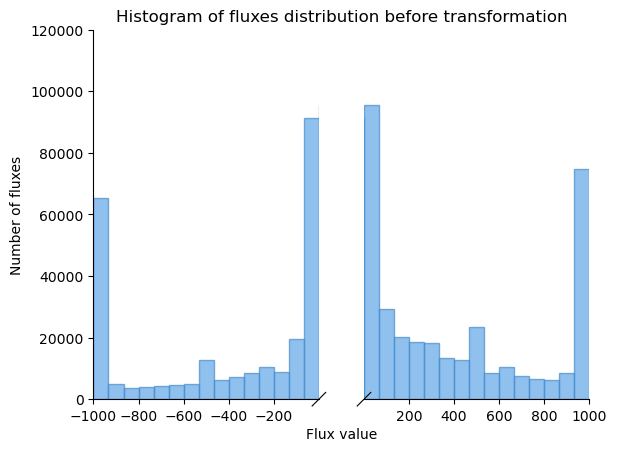

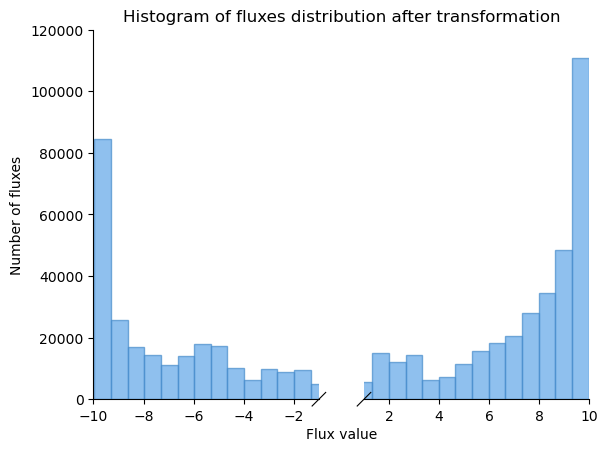

In [6]:
fb_array = fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-1000, -1), (1, 1000)))
bax.hist(fb_array[~((fb_array > -1) & (fb_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution before transformation")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

fa_array = t_fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-10, -1), (1, 10)))
bax.hist(fa_array[~((fa_array > -1) & (fa_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution after transformation")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

## REACTIONS FILTERING

In order to minimize the amount of noise in the data frame, we need to filter out reactions that have a flux of 0 in almost all models. To achieve this, we will use the interquartile range. Any reaction with an IQR value of 0 will be excluded.

- Filtering by IQR will help us to eliminate reactions that are present in only a few models.
- This approach is more reliable than other statistical methods, as it avoids the need for arbitrary thresholds and is therefore more robust.

In [7]:
rx = pd.DataFrame(columns=['Reaction', 'IQR'])
for col in t_fluxes_df.columns:
    IQR = iqr(t_fluxes_df[col])
    if IQR != 0:
        rx = pd.concat([rx, pd.DataFrame({'Reaction': [col], 'IQR': [IQR]})], ignore_index = True)

ft_fluxes_df = t_fluxes_df[rx['Reaction']]
rx

,Reaction,IQR
0,3HBCDm,1.332268e-15
1,ABTD,9.965784e+00
2,ACACT1rm,6.769585e-14
3,ACACT1x,6.547685e+00
4,AKGMALtm,1.716960e-13
...,...,...
256,EX_gln_L[e],5.842629e+00
257,sink_ser_L[c],6.382679e+00
258,r1418,9.540692e+00
259,EX_leu_L[e],5.836875e+00


# RESULTS VISUALIZATION

## COLOR MAPPING

For the visualization, we will use different colors to represent the cell type of origin from the single-cell models.

In [8]:
c_labs = pd.read_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/PBMC/clabs_pbmc.csv')
d_clabs = {type: group['Cell_Name'].tolist() for type, group in c_labs.groupby('Cluster_Label')}     
colors = [next((ct_to_col[type] for type, cells in d_clabs.items() if cell in cells)) for cell in fluxes_df.index]

In [9]:
l = []; l_labs = []

for key, value in d_clabs.items():
    l.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = ct_to_col[key], markersize = 10))
    l_labs.append(key)

## UMAP PROJECTION

This visualization represents a UMAP projection where each dot corresponds to a metabolic model derived from the scRNA-seq PBMC 3K dataset, with 2638 cells determined by 261 reaction fluxes. The distinct clusters of metabolic states that emerge from this analysis reveal the heterogeneity and complexity of cellular metabolism within similar cell types.

/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


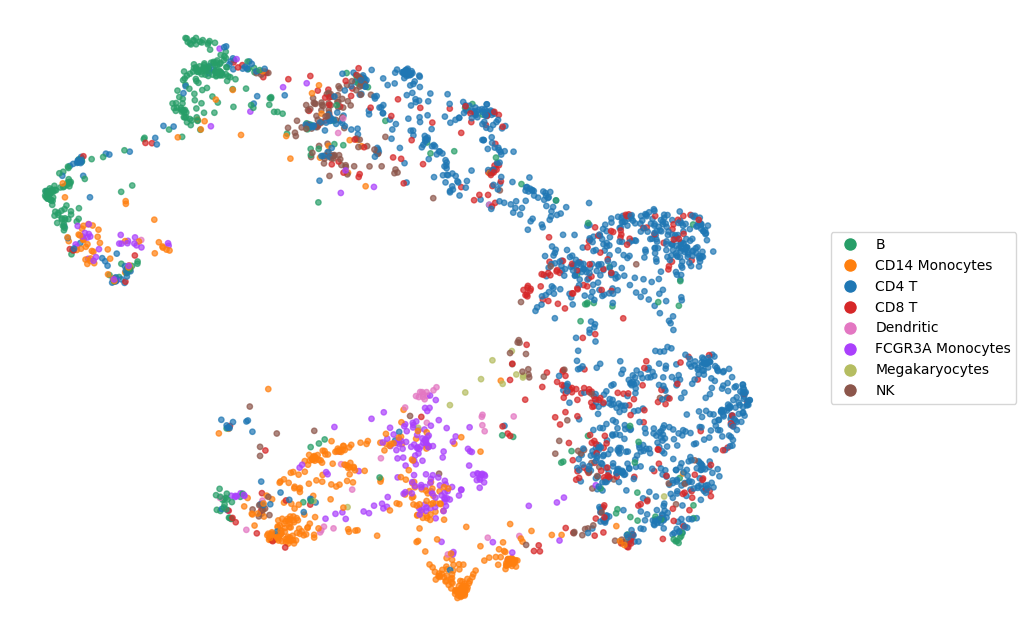

In [10]:
reducer = umap.UMAP(n_neighbors = 30, min_dist = 0.1, random_state = 42)
embedding = reducer.fit_transform(ft_fluxes_df)

plt.figure(figsize = (10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = colors, s = 15, alpha = .7) 
plt.legend(l, l_labs, bbox_to_anchor = (1.05, 0.5), loc = 'center left')
plt.axis('off') 
plt.savefig("umap.svg")
plt.show()

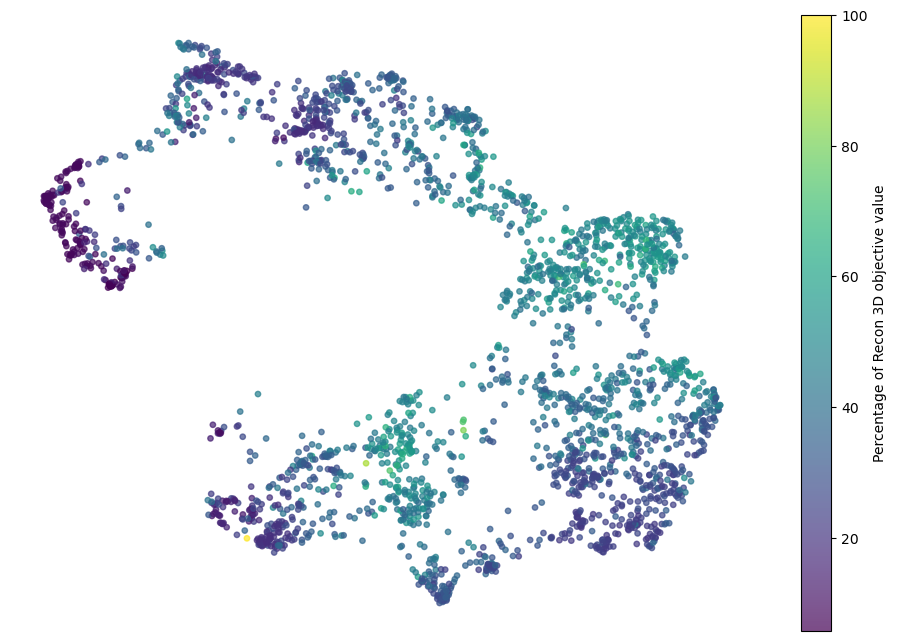

In [11]:
fd_ov = dict(zip(r_models.index, r_models['percent_ov']))

plt.figure(figsize = (12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = [fd_ov.get(index, -1) for index in ft_fluxes_df.index], cmap = "viridis", s = 15, alpha = .7)
plt.colorbar(label = 'Percentage of Recon 3D objective value')  
plt.axis('off') 
plt.show()

# CELL-TYPES COMPARATIVE ANALYSIS

For further examination of the results, we will perform a t-test and a hypergeometric test between different cell types.

In [12]:
b_cells = ft_fluxes_df.loc[[cell for cell in d_clabs.get("B")]]
cd4t_cells = ft_fluxes_df.loc[[cell for cell in d_clabs.get("CD4 T")]]
cd8t_cells = ft_fluxes_df.loc[[cell for cell in d_clabs.get("CD8 T")]]
fcgr3a_mono = ft_fluxes_df.loc[[cell for cell in d_clabs.get("FCGR3A Monocytes")]]
cd14_mono = ft_fluxes_df.loc[[cell for cell in d_clabs.get("CD14 Monocytes")]]

## T-TEST

To perform the t-test, we will use a function from the functions.py script. This function compares two data frames - representing two cell types - and corrects the resulting p-values for each reaction using FDR. It returns two data frames as well as a "volcano plot" that displays the difference in each reaction between the two cell types.

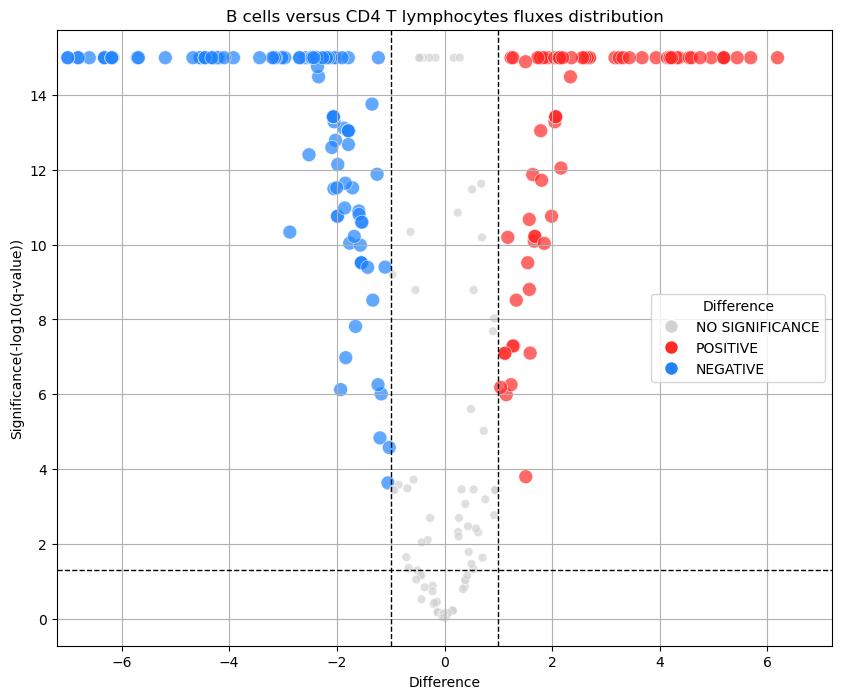

/Users/claudiavicentecomorera/Desktop/TFG/Scripts/functions.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_values = stats.ttest_ind(df1, df2, axis = 0)


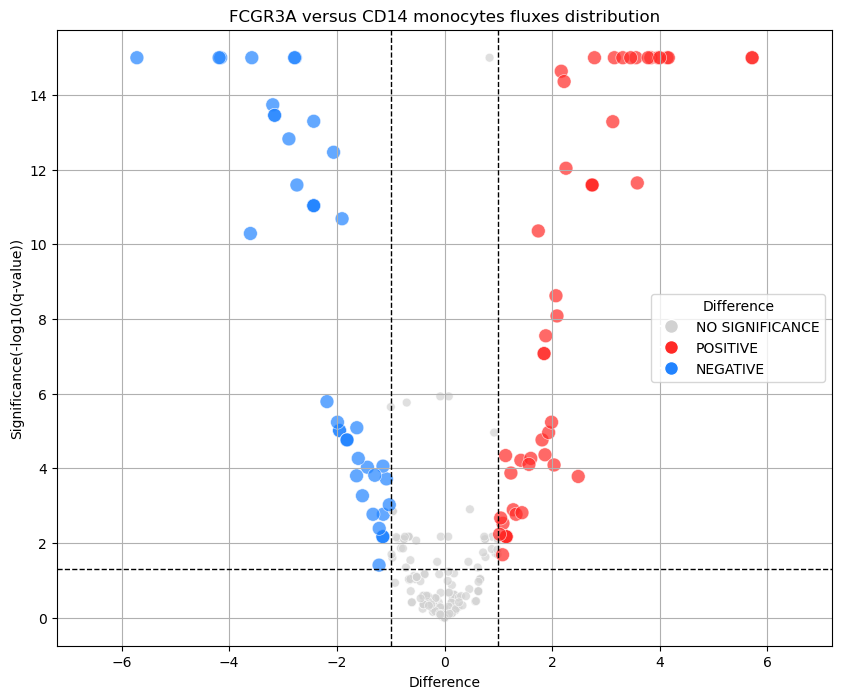

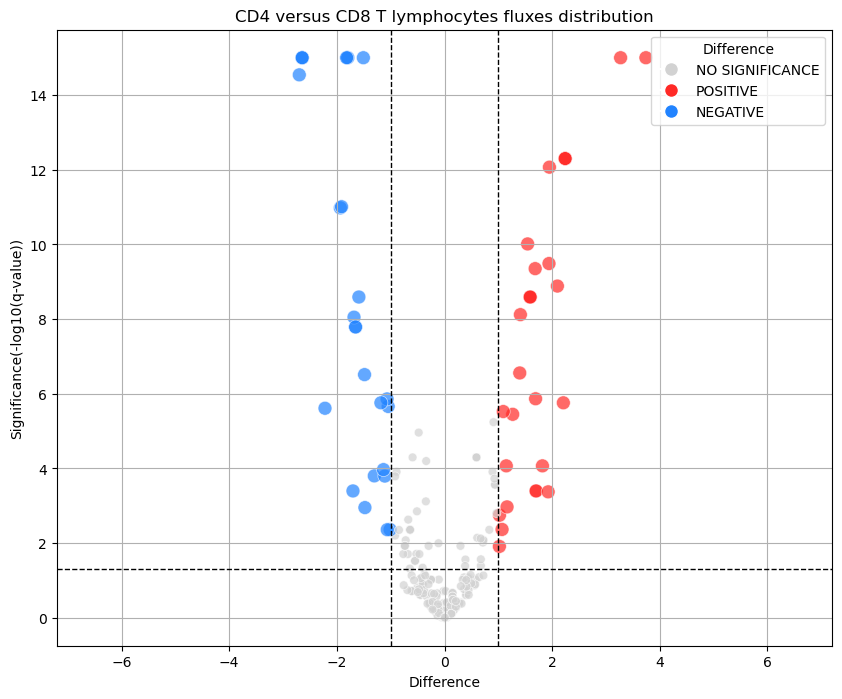

In [13]:
t_lymph_results, ts_lymph_results = functions.ttest_viz(b_cells, cd4t_cells, 'B cells versus CD4 T lymphocytes fluxes distribution', 'BvsT.svg')
t_mono_results, ts_mono_results = functions.ttest_viz(fcgr3a_mono, cd14_mono, 'FCGR3A versus CD14 monocytes fluxes distribution', 'mono.svg')
t_t_results, ts_t_results = functions.ttest_viz(cd4t_cells, cd8t_cells, 'CD4 versus CD8 T lymphocytes fluxes distribution', 'tlymph.svg')

## HYPERGEOMETRIC TEST

The hypergeometric test function is also defined in the functions.py script. It requires two input data frames: one containing the subsystem (pathway) to which each reaction from Recon 3D belongs, and the other containing significant reactions obtained from the t-test function. The function performs the analysis to identify enriched pathways that differ between two cell types. It also adjusts the obtained p-values by FDR correction. Finally, it returns two data frames with the results and a dot plot that displays the significantly enriched pathways.

In [14]:
subsystems_df = pd.read_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/Recon3D_301/recon3D_subsystems.csv', index_col = 0)

In [15]:
ht_lymph_results, hts_lymph_results = functions.hgtest_viz(subsystems_df, ts_lymph_results, 'BvsT_hg.svg')
ht_mono_results, hts_mono_results = functions.hgtest_viz(subsystems_df, ts_mono_results, 'mono_hg.svg')
ht_t_results, hts_t_results = functions.hgtest_viz(subsystems_df, ts_t_results, 'tlymph_hg.svg')

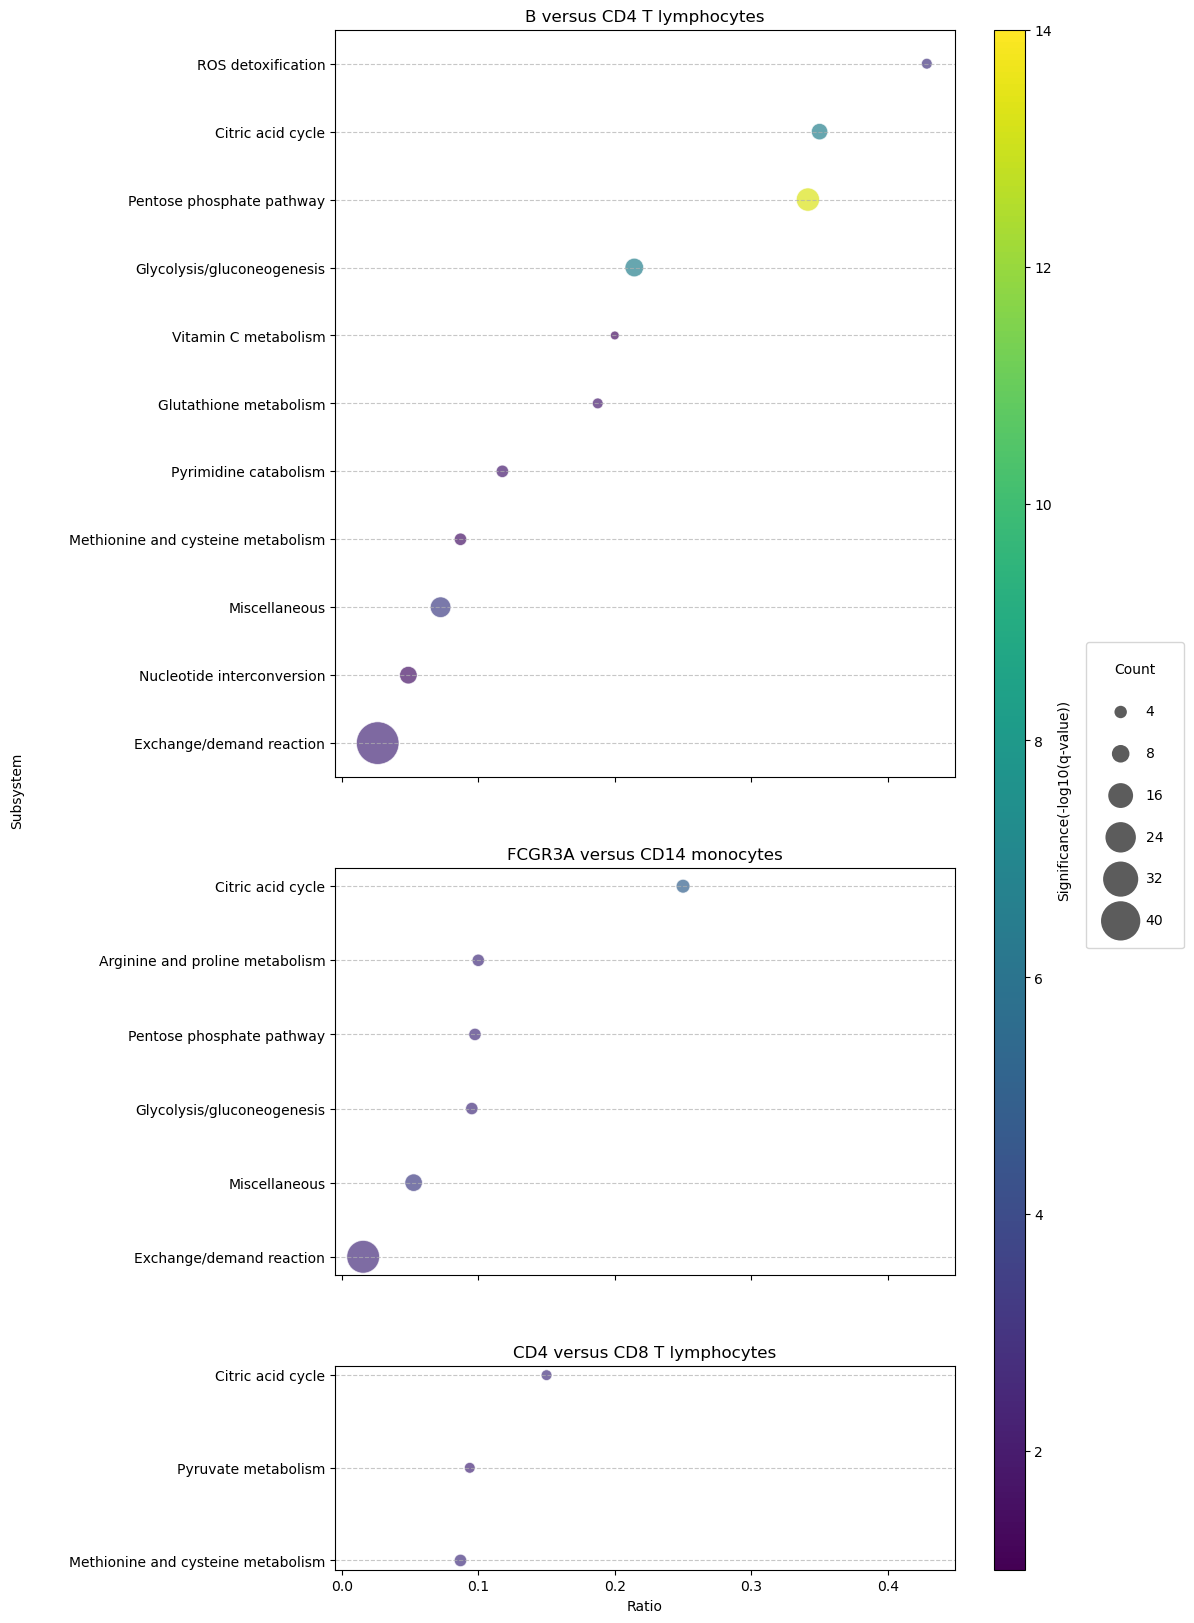

In [16]:
fig, axes = plt.subplots(3, 1, figsize = (10, 20), sharex = True, gridspec_kw = {'height_ratios': [len(hts_lymph_results), len(hts_mono_results), len(hts_t_results)]})
for ax, hts_result, title in zip(axes, [hts_lymph_results, hts_mono_results, hts_t_results], 
                                    ['B versus CD4 T lymphocytes', 'FCGR3A versus CD14 monocytes', 'CD4 versus CD8 T lymphocytes']):
    cmap = plt.cm.viridis
    normalizer = plt.Normalize(1, 14)
    col = cmap(normalizer(-np.log10(hts_result['q-value'])))
    im = plt.cm.ScalarMappable(norm=normalizer, cmap=cmap)

    sns.scatterplot(data = hts_result, x = 'Ratio', y = 'Subsystem', size = 'Count', sizes = (hts_result['Count'].min()*20, hts_result['Count'].max()*20), alpha = 0.7, color = col, legend = False, ax = ax)
    ax.grid(axis = 'y', linestyle='--', alpha = 0.7)
    ax.set_ylabel('')
    ax.set_title(title)

fig.colorbar(im, ax = axes.ravel().tolist(), label = 'Significance(-log10(q-value))', aspect = 50)

legend_sizes = [4, 8, 16, 24, 32, 40]
legend_elements = [plt.scatter([], [], s = s*20, color='#333333', edgecolor = 'none', alpha = 0.8, label = '{}'.format(s)) for s in legend_sizes]
plt.legend(handles = legend_elements, title = 'Count', loc='center left', bbox_to_anchor=(1.2, 3.8),  labelspacing = 2, borderpad = 1.5)
fig.text(-0.2, 0.5, 'Subsystem', va = 'center', rotation = 'vertical')

plt.savefig("subplots_hg.svg")
plt.show()